In [2]:
from object_detector import draw_objects, get_objects
from memes import remove_text, recognize_text
import cv2
import matplotlib.pyplot as plt
from meme_toxic_api import is_toxic
%matplotlib inline

f:\Documents\computervis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


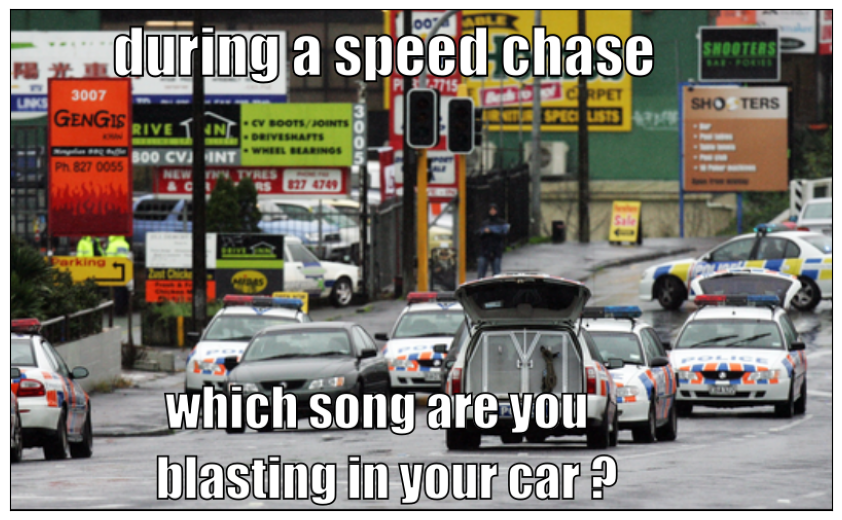

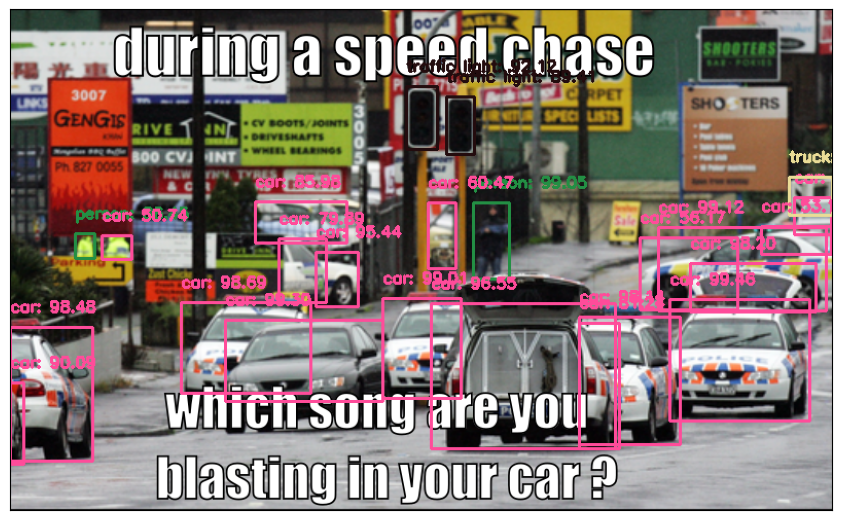

In [3]:
def show_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20,6.5))
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.imshow(img)


img_path = '../hateful_memes/img/05741.png'
image = cv2.imread(img_path)
show_img(image)
new_image = draw_objects(image)
show_img(new_image)

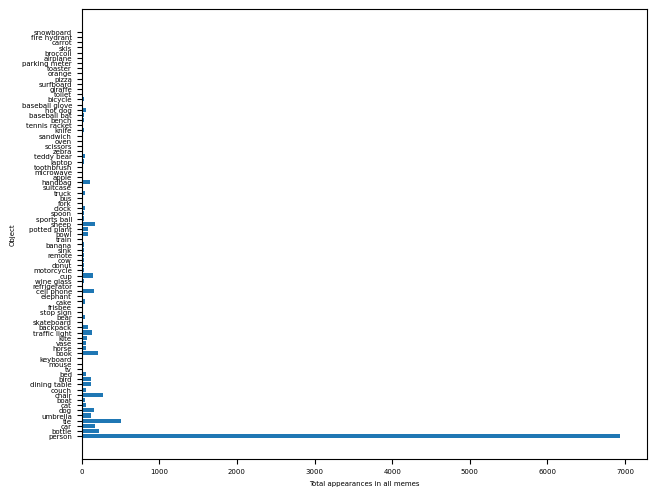

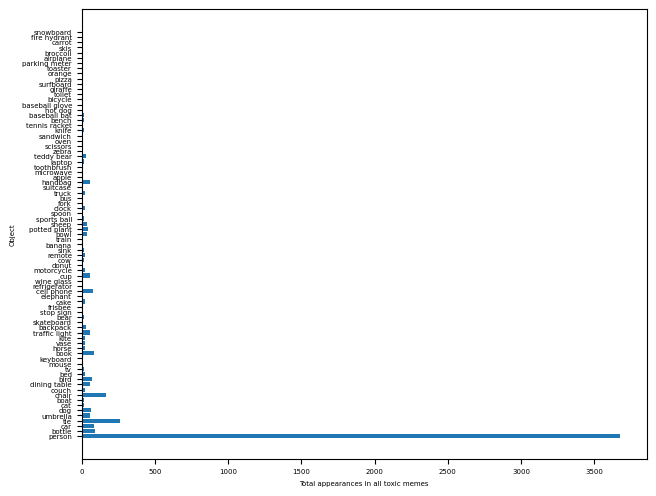

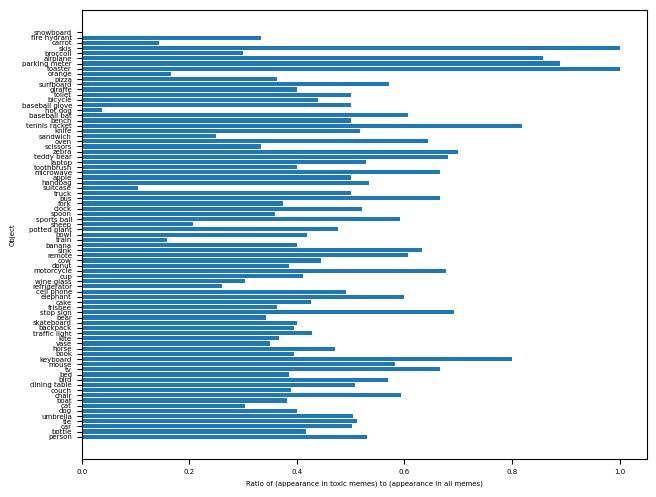

In [4]:
import json

def show_bars(x, y, label):
    plt.barh(x, y)
    plt.tight_layout()
    plt.xlabel(label)
    plt.ylabel("Object")
    plt.show()

with open('total_objects.json', 'r') as f:
    total_appearance_dict = json.loads(f.read())

with open('toxic_objects.json', 'r') as f:
    toxic_appearance_dict = json.loads(f.read())

objects = []
y_total = []
y_toxic = []
y_ratio = []
for u,v in total_appearance_dict.items():
    objects.append(u)
    y_total.append(v)
    y_toxic.append(toxic_appearance_dict.get(u,0))
    y_ratio.append(toxic_appearance_dict.get(u,0)/total_appearance_dict[u])

plt.rcParams.update({'font.size': 5})

show_bars(objects, y_total, "Total appearances in all memes")
show_bars(objects, y_toxic, "Total appearances in all toxic memes")
show_bars(objects, y_ratio, "Ratio of (appearance in toxic memes) to (appearance in all memes)")

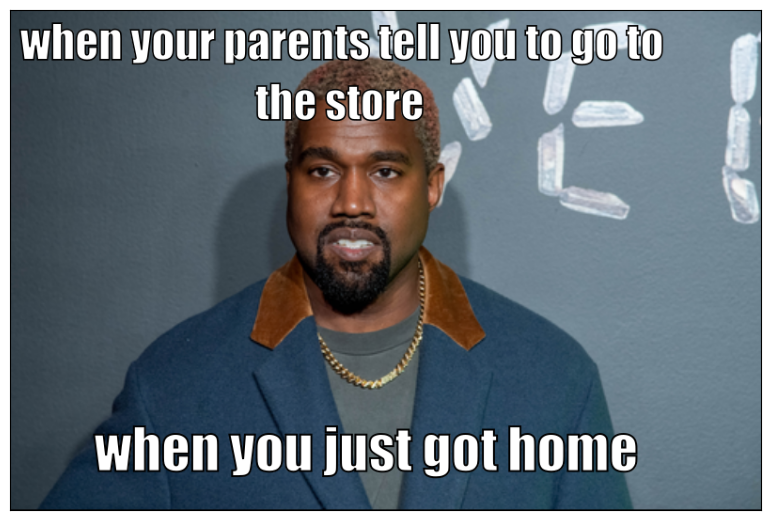

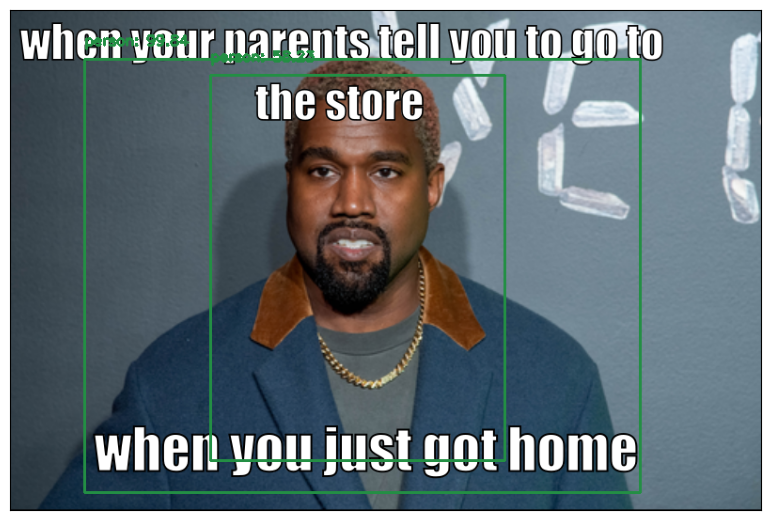

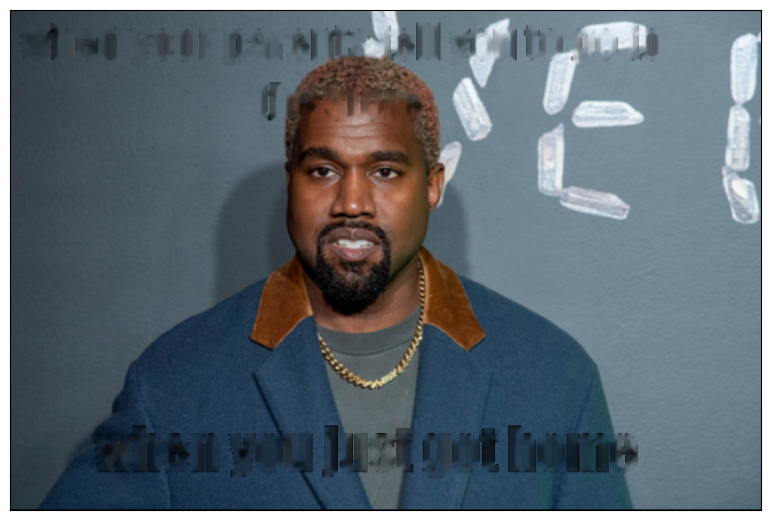

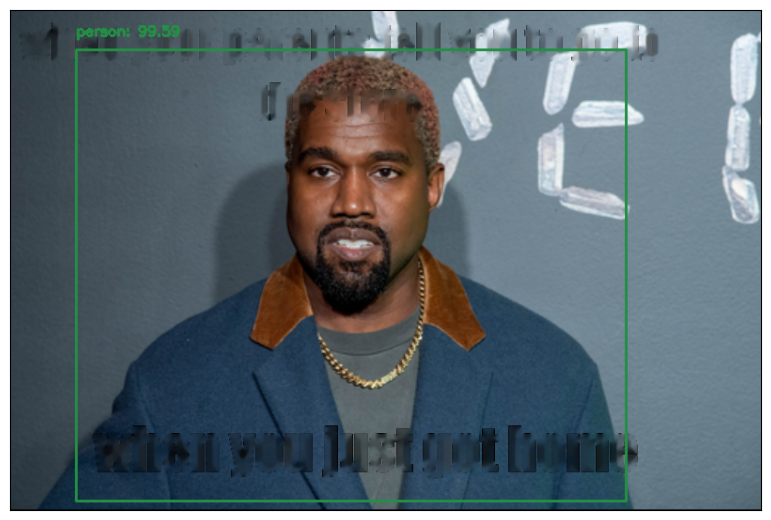

In [5]:
# img_path = '../hateful_memes/img/12093.png'
img_path = '../hateful_memes/img/13765.png'
image = cv2.imread(img_path)
show_img(image)
orig = image.copy()
draw_objects(image)
show_img(image)
new_image = remove_text(orig)
show_img(new_image)
new_image_obj = draw_objects(new_image)

show_img(new_image_obj)

../task3/nonmeme.png: not a meme: (0, 3.7677323818206787)
../task3/meme.png: meme: (1, 4.543298721313477)


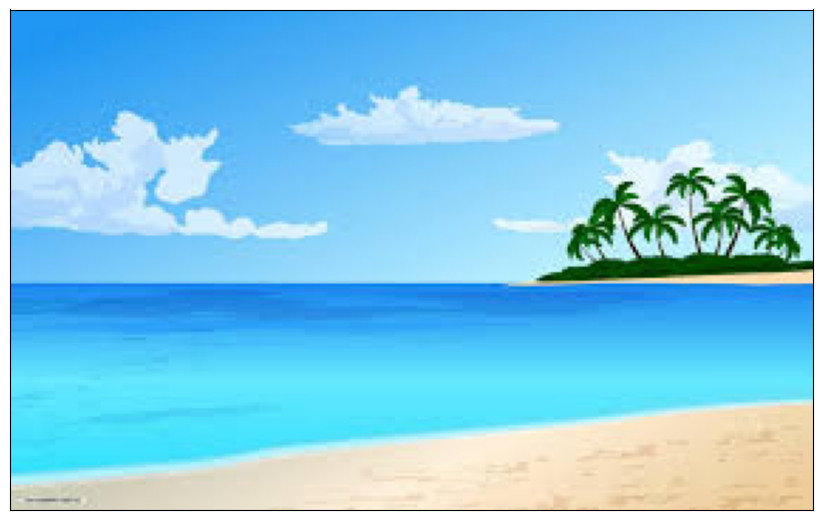

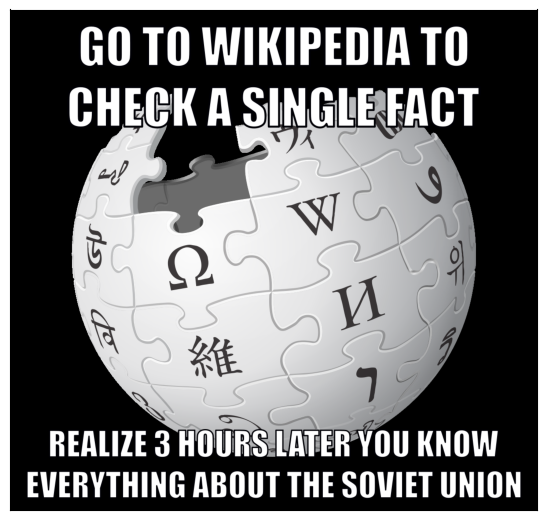

In [6]:
from meme_classifier_api import is_meme_or_not

img_path = '../task3/nonmeme.png'
image = cv2.imread(img_path)
show_img(image)
print(img_path, "meme" if is_meme_or_not(image)[0] else "not a meme", is_meme_or_not(image), sep=': ')

img_path = '../task3/meme.png'
image = cv2.imread(img_path)
show_img(image)
print(img_path, "meme" if is_meme_or_not(image)[0] else "not a meme", is_meme_or_not(image), sep=': ')

f:\Documents\computervis\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


toxic
not toxic


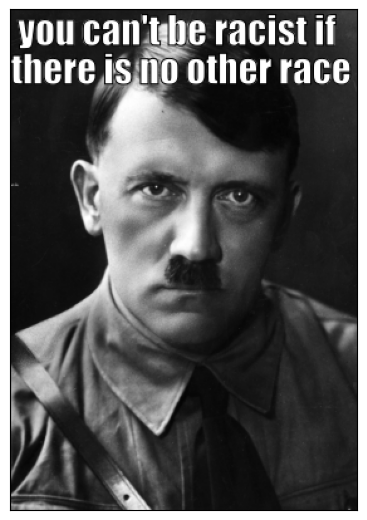

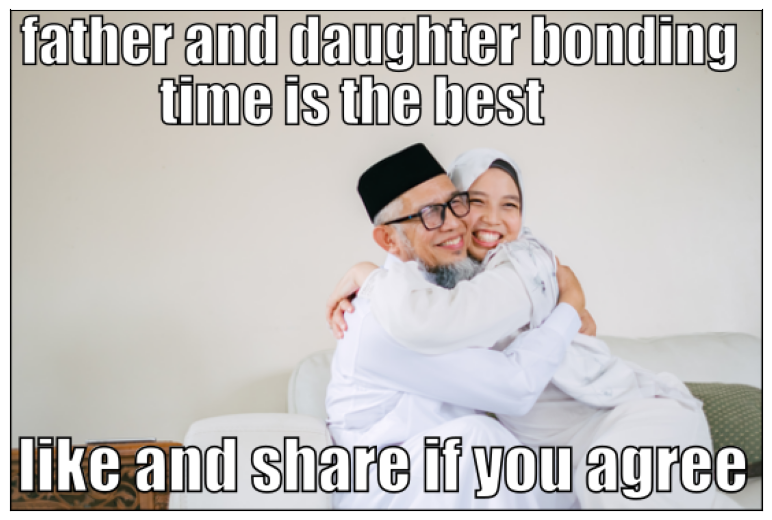

In [10]:
img_path = '../hateful_memes/img/01247.png'

cv_img = cv2.imread(img_path)
show_img(cv_img)

text = recognize_text(cv_img)
cv_img = remove_text(cv_img)

objects = get_objects(cv_img)
objects = [i[0] for i in objects]
istoxic = is_toxic(text, objects)

print("toxic" if istoxic else "not toxic")

img_path = "../hateful_memes/img/01268.png"

cv_img = cv2.imread(img_path)
show_img(cv_img)

text = recognize_text(cv_img)
cv_img = remove_text(cv_img)

objects = get_objects(cv_img)
objects = [i[0] for i in objects]
istoxic = is_toxic(text, objects)

print("toxic" if istoxic else "not toxic")